In [1]:
import pandas as pd

df = pd.read_csv('/content/final_dataset.csv')

display(df.head())
display(df.info())
display(df.describe())
display(df.nunique())

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1461 non-null   int64  
 1   Month           1461 non-null   int64  
 2   Year            1461 non-null   int64  
 3   Holidays_Count  1461 non-null   int64  
 4   Days            1461 non-null   int64  
 5   PM2.5           1461 non-null   float64
 6   PM10            1461 non-null   float64
 7   NO2             1461 non-null   float64
 8   SO2             1461 non-null   float64
 9   CO              1461 non-null   float64
 10  Ozone           1461 non-null   float64
 11  AQI             1461 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 137.1 KB


None

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,15.729637,6.522930,2022.501027,0.189596,4.000684,90.774538,218.219261,37.184921,20.104921,1.025832,36.338871,202.210815
std,8.803105,3.449884,1.118723,0.392116,2.001883,71.650579,129.297734,35.225327,16.543659,0.608305,18.951204,107.801076
min,1.000000,1.000000,2021.000000,0.000000,1.000000,0.050000,9.690000,2.160000,1.210000,0.270000,2.700000,19.000000
25%,8.000000,4.000000,2022.000000,0.000000,2.000000,41.280000,115.110000,17.280000,7.710000,0.610000,24.100000,108.000000
50%,16.000000,7.000000,2023.000000,0.000000,4.000000,72.060000,199.800000,30.490000,15.430000,0.850000,32.470000,189.000000
75%,23.000000,10.000000,2024.000000,0.000000,6.000000,118.500000,297.750000,45.010000,26.620000,1.240000,45.730000,284.000000
max,31.000000,12.000000,2024.000000,1.000000,7.000000,1000.000000,1000.000000,433.980000,113.400000,4.700000,115.870000,500.000000


,0
Date,31
Month,12
Year,4
Holidays_Count,2
Days,7
PM2.5,1391
PM10,1436
NO2,1308
SO2,1180
CO,240


In [2]:
from sklearn.preprocessing import RobustScaler

numerical_cols = ['Holidays_Count', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI']
df_numerical = df[numerical_cols]

scaler = RobustScaler()
scaled_data = scaler.fit_transform(df_numerical)

scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)
display(scaled_df.head())

,Holidays_Count,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,0.0,4.360787,1.328406,4.692391,-0.131148,3.047619,0.495608,1.551136
1,0.0,4.299145,1.982862,0.806347,-0.542041,2.777778,-0.741563,1.664773
2,1.0,1.981481,0.214849,5.065272,-0.237969,0.873016,0.546463,0.420455
3,0.0,0.226496,-0.370784,4.453300,-0.264939,0.253968,0.773000,0.102273
4,0.0,-0.233100,-0.789860,3.323837,-0.303014,-0.333333,0.758669,-0.227273


In [4]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(random_state=42)
model.fit(scaled_df)

IsolationForest(random_state=42)

In [5]:
df['anomaly_score'] = model.decision_function(scaled_df)
df['is_anomaly'] = model.predict(scaled_df)

display(df.head())

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,anomaly_score,is_anomaly
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462,-0.159445,-1
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482,-0.124152,-1
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263,-0.067099,-1
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207,0.025079,1
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149,0.010470,1


In [6]:
anomalies_df = df[df['is_anomaly'] == -1]
display(anomalies_df.head())

anomalies_desc = anomalies_df[df_numerical.columns].describe()
display(anomalies_desc)

overall_desc = df_numerical.describe()
display(overall_desc)

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,anomaly_score,is_anomaly
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462,-0.159445,-1
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482,-0.124152,-1
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263,-0.067099,-1
9,10,1,2021,1,7,131.57,180.38,93.31,9.92,0.69,51.96,284,-0.029748,-1
13,14,1,2021,0,4,345.82,417.42,142.59,8.49,1.75,32.11,422,-0.075652,-1


,Holidays_Count,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.461538,175.853942,365.213413,65.677212,28.550577,1.752933,34.911490,323.557692
std,0.499721,114.389832,170.049500,69.028560,25.280394,0.920281,23.920814,114.829538
min,0.000000,0.050000,9.690000,3.090000,1.320000,0.270000,2.700000,19.000000
25%,0.000000,108.017500,274.787500,22.510000,8.067500,1.082500,18.345000,281.250000
50%,0.000000,157.410000,375.540000,47.080000,20.485000,1.675000,29.115000,358.500000
75%,1.000000,234.050000,466.655000,77.292500,44.330000,2.340000,41.672500,403.000000
max,1.000000,1000.000000,1000.000000,433.980000,113.400000,4.700000,115.870000,500.000000


,Holidays_Count,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,0.189596,90.774538,218.219261,37.184921,20.104921,1.025832,36.338871,202.210815
std,0.392116,71.650579,129.297734,35.225327,16.543659,0.608305,18.951204,107.801076
min,0.000000,0.050000,9.690000,2.160000,1.210000,0.270000,2.700000,19.000000
25%,0.000000,41.280000,115.110000,17.280000,7.710000,0.610000,24.100000,108.000000
50%,0.000000,72.060000,199.800000,30.490000,15.430000,0.850000,32.470000,189.000000
75%,0.000000,118.500000,297.750000,45.010000,26.620000,1.240000,45.730000,284.000000
max,1.000000,1000.000000,1000.000000,433.980000,113.400000,4.700000,115.870000,500.000000


In [7]:
df['is_anomaly_binary'] = df['is_anomaly'].map({-1: 1, 1: 0})
display(df.head())

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,anomaly_score,is_anomaly,is_anomaly_binary
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462,-0.159445,-1,1
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482,-0.124152,-1,1
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263,-0.067099,-1,1
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207,0.025079,1,0
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149,0.010470,1,0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df[['Holidays_Count', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI']]
y = df['is_anomaly_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9488
Precision: 0.8718
Recall: 0.7727
F1-score: 0.8193


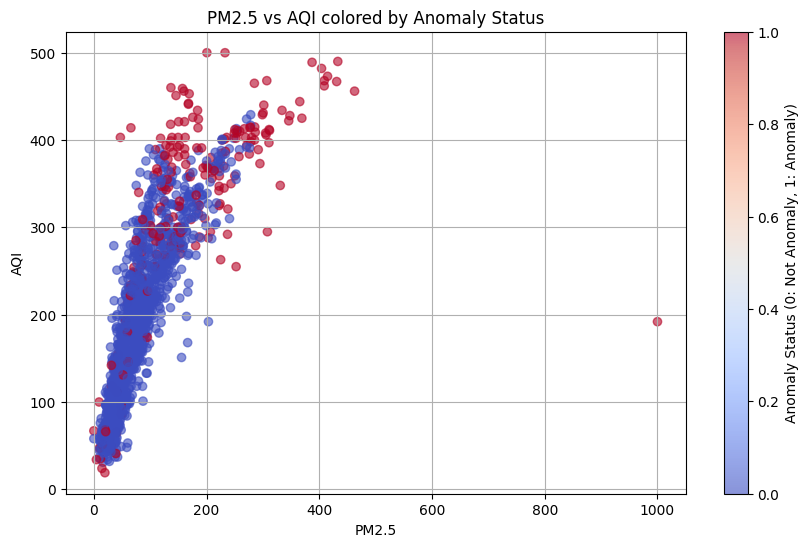

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['PM2.5'], df['AQI'], c=df['is_anomaly_binary'], cmap='coolwarm', alpha=0.6)
plt.xlabel('PM2.5')
plt.ylabel('AQI')
plt.title('PM2.5 vs AQI colored by Anomaly Status')
plt.colorbar(scatter, label='Anomaly Status (0: Not Anomaly, 1: Anomaly)')
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains 1461 rows and 12 columns, with no apparent missing values.
*   The numerical features, particularly air quality metrics like PM2.5, PM10, NO2, SO2, CO, Ozone, and AQI, exhibit a wide range of values.
*   Initial data exploration and subsequent anomaly analysis revealed that identified anomalies are primarily characterized by significantly higher concentrations of air pollutants and consequently higher AQI values compared to the rest of the dataset. The mean AQI for anomalies is 323.56, while the overall mean is 202.21.
*   An Isolation Forest model was successfully trained to identify anomalies, and these anomaly results were added as a binary feature (`is_anomaly_binary`) to the dataset for subsequent modeling.
*   A Logistic Regression model was trained to predict the anomaly status (`is_anomaly_binary`) based on the air quality features. The model achieved an accuracy of 0.9488, precision of 0.8718, recall of 0.7727, and an F1-score of 0.8193 on the test set.

